**Métodos Estatísticos - PCA e SVM**

In [1]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [2]:
# Carregar o dataset MNIST
digits = datasets.load_digits()
X, y = digits.data, digits.target

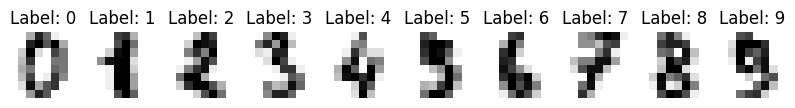

In [3]:
n = 10  # número de imagens que você quer mostrar
fig, axes = plt.subplots(1, n, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Label: %i' % label)
plt.show()

In [4]:
# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Criar um pipeline com PCA e SVM
clf = make_pipeline(StandardScaler(), PCA(n_components=30), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=30)), ('svc', SVC(gamma='auto'))])

In [6]:
# Avaliar o classificador
print(f"Acurácia no conjunto de teste: {clf.score(X_test, y_test):.2f}")

Acurácia no conjunto de teste: 0.98


**Métodos Estruturais: Detecção de Bordas e Formas**

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Importar cv2_imshow

In [8]:
# Carregar uma imagem
image = cv2.imread('geometric_shapes.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [9]:
# Aplicar detecção de bordas de Canny
edged = cv2.Canny(gray, 30, 200)

In [10]:
# Encontrar contornos
contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [12]:
for contour in contours:
    # Aproximar os contornos para formas
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
    cv2.drawContours(image, [approx], 0, (0, 0, 255), 5)
    if len(approx) == 3:
        shape_name = "Triângulo"
    elif len(approx) == 4:
        shape_name = "Quadrado ou Retângulo"
    elif len(approx) > 10:
        shape_name = "Círculo"
    else:
        shape_name = "Polígono"

    # Adicionar nome da forma na imagem
    cv2.putText(image, shape_name, (contour[0][0][0], contour[0][0][1]), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0), 2)

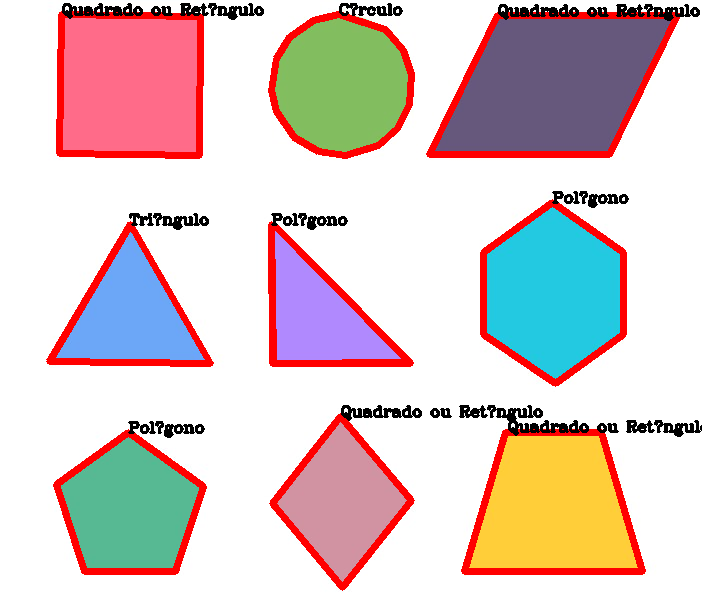

In [13]:
# Exibir a imagem com as formas identificadas
cv2_imshow(image)  # Usar cv2_imshow ao invés de cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

**Redes Neurais Convolucionais (CNNs) para Classificação de Imagens**

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [15]:
# Carregar o dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [16]:
# Normalizar os dados
X_train, X_test = X_train / 255.0, X_test / 255.0

In [17]:
# Definir nomes das classes do CIFAR-10
class_names = ['avião', 'carro', 'pássaro', 'gato', 'veado', 'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão']

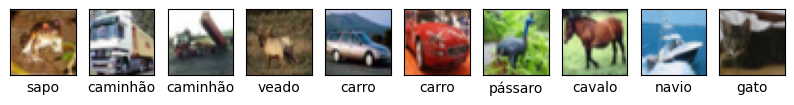

In [18]:
# Visualizar as primeiras n imagens do conjunto de treinamento
n = 10  # Número de imagens para visualizar
plt.figure(figsize=(10, 10))
for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [19]:
# Construir o modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [20]:
# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Treinar o modelo
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 67s 42ms/step - loss: 1.4854 - accuracy: 0.4652 - val_loss: 1.2317 - val_accuracy: 0.5673
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.1325 - accuracy: 0.6041 - val_loss: 1.1202 - val_accuracy: 0.6106
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0118 - accuracy: 0.6491 - val_loss: 1.0565 - val_accuracy: 0.6327
Epoch 4/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9340 - accuracy: 0.6760 - val_loss: 1.0564 - val_accuracy: 0.6310
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8729 - accuracy: 0.6971 - val_loss: 0.9328 - val_accuracy: 0.6817
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8236 - accuracy: 0.7131 - val_loss: 0.9223 - val_accuracy: 0.6879
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7808 - accuracy: 0.7285 - val_loss: 0.9036 -

In [ ]:
# Avaliar o modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Acurácia no teste: {test_acc:.2f}")

313/313 - 2s - loss: 0.9084 - accuracy: 0.7073 - 2s/epoch - 8ms/step
Acurácia no teste: 0.71


In [ ]:
# Salvar o modelo
model.save('meu_modelo_cifar10')

In [ ]:
# Carregando o modelo salvo
model_saved = tf.keras.models.load_model('meu_modelo_cifar10')

In [ ]:
# Avaliar o modelo salvo e carregado
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Acurácia no teste: {test_acc:.2f}")

313/313 - 2s - loss: 0.9084 - accuracy: 0.7073 - 2s/epoch - 6ms/step
Acurácia no teste: 0.71
